In [1]:
# import dependencies
# import sys
# !{sys.executable} -m pip install easydev
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg3
import pandas as pd
import glacierml as gl
import numpy as np
import warnings
import tensorflow as tf
from tensorflow.python.util import deprecation
import os
import logging
from tqdm import tqdm
from IPython.display import display, HTML
import geopy
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
import pacmap
from ds_utils.unsupervised import (
    plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
)
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score




# display(HTML("<style>.container { width:85% !important; }</style>"))
tf.get_logger().setLevel(logging.ERROR)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
deprecation._PRINT_DEPRECATION_WARNINGS = False
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
pd.set_option('display.max_columns', None)

pd.set_option('mode.chained_assignment', None)

RS = range(0,25,1)

print('currently running tensorflow version: ' + tf.__version__)

2022-09-02 13:15:59.500930: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


currently running tensorflow version: 2.9.1


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
# # define functions

# def silhouette_plot(X, model, ax, colors):
#     y_lower = 10
#     y_tick_pos_ = []
#     sh_samples = silhouette_samples(X, model.labels_)
#     sh_score = silhouette_score(X, model.labels_)
    
#     for idx in range(model.n_clusters):
#         values = sh_samples[model.labels_ == idx]
#         values.sort()
#         size = values.shape[0]
#         y_upper = y_lower + size
#         ax.fill_betweenx(np.arange(y_lower, y_upper),0,values,
#                          facecolor=colors[idx],edgecolor=colors[idx]
#         )
#         y_tick_pos_.append(y_lower + 0.5 * size)
#         y_lower = y_upper + 10

#     ax.axvline(x=sh_score, color="red", linestyle="--", label="Avg Silhouette Score")
#     ax.set_title("Silhouette Plot for {} clusters".format(model.n_clusters))
#     l_xlim = max(-1, min(-0.1, round(min(sh_samples) - 0.1, 1)))
#     u_xlim = min(1, round(max(sh_samples) + 0.1, 1))
#     ax.set_xlim([l_xlim, u_xlim])
#     ax.set_ylim([0, X.shape[0] + (model.n_clusters + 1) * 10])
#     ax.set_xlabel("silhouette coefficient values")
#     ax.set_ylabel("cluster label")
#     ax.set_yticks(y_tick_pos_)
#     ax.set_yticklabels(str(idx) for idx in range(model.n_clusters))
#     ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
#     ax.legend(loc="best")
#     return ax



# def rgb_to_hex(rgb):
#     return '%02x%02x%02x' % rgb




# def cluster_comparison_bar(RGI_comparison, colors, deviation=True ,title="Cluster results"):
    
#     features = RGI_comparison.index
#     ncols = 3
#     # calculate number of rows
#     nrows = len(features) // ncols + (len(features) % ncols > 0)
#     # set figure size
#     fig = plt.figure(figsize=(15,15), dpi=200)
#     #interate through every feature
#     for n, feature in enumerate(features):
#         # create chart

# #     plt.show()    
#         ax = plt.subplot(nrows, ncols, n + 1)
#         RGI_comparison[RGI_comparison.index==feature].plot(
#             kind='bar', 
#             ax=ax, 
#             title=feature,
#             color=colors[0:RGI['cluster'].nunique()],
#             legend=False
#                                                             )
#         plt.axhline(y=0)
#         x_axis = ax.axes.get_xaxis()
#         x_axis.set_visible(False)

#     c_labels = RGI_comparison.columns.to_list()
#     c_colors = colors[0:3]
#     mpats = [mpatches.Patch(color=c, label=l) for c,l in list(zip(
#         colors[0:RGI['cluster'].nunique()],
#         RGI_comparison.columns.to_list()
#     ))]

#     fig.legend(handles=mpats,
#                ncol=ncols,
#                loc="upper center",
#                fancybox=True,
#                bbox_to_anchor=(0.5, 0.98)
#               )
#     axes = fig.get_axes()
    
#     fig.suptitle(title, fontsize=18, y=1)
#     fig.supylabel('Deviation from overall mean in %')
#     plt.tight_layout()
#     plt.subplots_adjust(top=0.93)
#     plt.show()
    
    
    
    
# class Radar(object):
#     def __init__(self, figure, title, labels, rect=None):
#         if rect is None:
#             rect = [0.05, 0.05, 0.9, 0.9]

#         self.n = len(title)
#         self.angles = np.arange(0, 360, 360.0/self.n)
        
#         self.axes = [
#             figure.add_axes(
#                 rect, projection='polar', label='axes%d' % i
#             ) for i in range(self.n)
#         ]
        
#         self.ax = self.axes[0]
#         self.ax.set_thetagrids(
#             self.angles, 
#             labels=title, 
#             fontsize=14, 
#             backgroundcolor="white",
#             zorder=999
#         ) 
#         # Feature names
#         self.ax.set_yticklabels([])
# #         self.ax.set_xscale('log')
# #         self.ax.set_yscale('log')
#         for ax in self.axes[1:]:
#             ax.xaxis.set_visible(False)
#             ax.set_yticklabels([])
#             ax.set_zorder(-99)
            
#         for ax, angle, label in zip(self.axes, self.angles, labels):
#             ax.spines['polar'].set_color('black')
#             ax.spines['polar'].set_zorder(-99)
                     
#             ax.set_rscale('symlog')
# #             ax.set_yscale('log')
#     def plot(self, values, *args, **kw):
#         angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
#         values = np.r_[values, values[0]]
#         self.ax.plot(angle, values, *args, **kw)
#         kw['label'] = '_noLabel'
#         self.ax.fill(angle, values,*args,**kw)


In [3]:
prethicked = gl.predictions_finder()
prethicked

100%|██████████| 142/142 [00:01<00:00, 111.65it/s]


,architecture,epochs,learning rate,training module
0,50-28,100,0.1,7
19,24-12,100,0.1,1
38,64-48,100,0.1,2
57,59-28,100,0.1,3
76,64-36,100,0.1,4
95,50-25,100,0.1,5


In [4]:
idx = 0
training_module = prethicked['training module'].loc[idx]
architecture = prethicked['architecture'].loc[idx]
learning_rate = prethicked['learning rate'].loc[idx]
epochs = prethicked['epochs'].loc[idx]
df = gl.predictions_loader(
    training_module = training_module,
    architecture = architecture,
    learning_rate = learning_rate,
    epochs = epochs
    
)

gl.glathida_stats_adder(
    df,
#     pth_1 = '/home/simonhans/data/prethicktor/regional_data/raw/',
#     pth_2 = '/home/simonhans/data/prethicktor/RGI/rgi60-attribs/',
#     pth_3 = '/home/simonhans/data/prethicktor/regional_data/training_data/',
)
df

100%|██████████| 15/15 [00:00<00:00, 375.08it/s]


,vol,Area_RGI_iqr,Area_RGI_mean,Area_RGI_median,Area_RGI_std,Aspect_RGI_iqr,Aspect_RGI_mean,Aspect_RGI_median,Aspect_RGI_std,Lmax_RGI_iqr,Lmax_RGI_mean,Lmax_RGI_median,Lmax_RGI_std,Slope_RGI_iqr,Slope_RGI_mean,Slope_RGI_median,Slope_RGI_std,Zmax_RGI_iqr,Zmax_RGI_mean,Zmax_RGI_median,Zmax_RGI_std,Zmin_RGI_iqr,Zmin_RGI_mean,Zmin_RGI_median,Zmin_RGI_std,architecture,area,dataframe,epochs,h mean f,learning rate,region,tolerance,total variance,volf,mean thickness,voldiff,Area_GlaThiDa_mean,Aspect_GlaThiDa_mean,Lmax_GlaThiDa_mean,Slope_GlaThiDa_mean,Zmin_GlaThiDa_mean,Zmax_GlaThiDa_mean,Area_GlaThiDa_median,Aspect_GlaThiDa_median,Lmax_GlaThiDa_median,Slope_GlaThiDa_median,Zmin_GlaThiDa_median,Zmax_GlaThiDa_median,Area_GlaThiDa_std,Aspect_GlaThiDa_std,Lmax_GlaThiDa_std,Slope_GlaThiDa_std,Zmin_GlaThiDa_std,Zmax_GlaThiDa_std,ratio trainable,vol_ratio,vol_from_zero
0,11.971913,0.68100,3.199242,0.3130,41.810153,234.00,192.250848,215.0,119.556115,1079.00,1532.236388,744.0,4166.345049,9.00,24.023993,23.00,7.280360,609.00,1816.157186,1797.0,554.464460,626.0,1337.327542,1334.0,500.317301,50-28,86725.053,df7_01,100,218.0,0.100,01,4.92,10.673079,18.98,138.044454,-7.008087,31.746125,178.125000,7208.750000,18.625000,1505.125000,2278.000000,1.8260,206.0,2351.0,21.00,1579.5,2554.0,76.730266,116.309326,13254.758068,5.452924,735.136116,800.062341,0.000295,0.630765,0.369235
1,1.538855,0.47200,0.770312,0.1820,4.561523,260.00,153.637072,103.0,127.722660,699.00,907.091806,567.0,1219.842485,9.50,24.509075,24.20,7.448535,678.00,2418.342668,2348.0,575.395510,651.0,2075.797666,1974.0,620.405019,50-28,14524.224,df7_02,100,72.0,0.100,02,0.27,8.179932,1.06,105.950909,0.478855,2.062406,168.531250,2526.000000,21.178125,2241.687500,3116.937500,1.1850,162.5,2138.0,20.80,2007.5,3011.0,3.074268,120.333387,2238.034517,5.621317,601.644384,608.579182,0.001697,1.451750,0.451750
2,15.218515,6.79175,23.110887,1.7665,124.489082,240.00,181.664028,183.0,120.751525,3503.25,4470.662929,1890.0,7968.824606,7.70,15.436148,14.35,6.115374,486.50,1053.961961,1059.0,367.481644,417.0,510.091689,524.5,292.298323,50-28,105108.312,df7_03,100,270.0,0.100,03,7.35,4.520922,28.33,144.788879,-13.111485,1238.533333,259.000000,54630.333333,6.100000,16.000000,1419.666667,999.8610,323.0,71606.0,6.30,0.0,1921.0,1046.519763,92.639085,32082.883332,0.509902,22.627417,819.563434,0.000658,0.537187,0.462813
3,4.216965,2.14750,5.514259,0.6570,43.879279,236.00,172.181254,163.0,120.474964,1924.50,2331.581389,1191.0,3683.474811,7.10,17.700000,16.90,5.800160,447.50,1119.713554,1120.0,315.732986,389.0,700.133378,695.0,303.851676,50-28,40888.228,df7_04,100,210.0,0.100,04,2.23,4.801514,8.61,103.133970,-4.393035,1479.180000,30.500000,31318.000000,7.300000,420.500000,1452.000000,1479.1800,30.5,31318.0,7.30,420.5,1452.0,1292.232000,20.500000,1445.000000,3.700000,17.500000,335.000000,0.000270,0.489775,0.510225
4,26.393191,1.70625,6.421827,0.3930,79.452633,216.00,179.796711,177.0,114.465345,1608.00,2042.748667,838.0,3956.978654,12.90,20.433266,19.60,9.216535,667.00,1253.893344,1221.0,488.323296,610.0,781.590460,761.0,436.168658,50-28,130054.846,df7_05,100,175.0,0.100,05,4.07,8.032514,15.69,202.938930,10.703191,20.154000,261.000000,8083.000000,11.300000,159.000000,983.000000,20.1540,261.0,8083.0,11.30,159.0,983.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000049,1.682166,0.682166
5,1.620819,2.58100,19.505422,0.5690,117.108721,229.00,170.499118,152.0,117.692026,2095.00,3148.227513,987.0,6825.961018,8.60,17.620459,16.70,6.571902,244.50,1295.209877,1267.0,247.578356,267.5,892.552028,936.0,252.231364,50-28,11059.574,df7_06,100,341.0,0.100,06,0.98,1.554516,3.77,146.553475,-2.149181,608.658000,142.000000,28302.666667,11.366667,477.666667,1511.000000,264.5360,117.0,22676.0,7.30,607.0,1762.0,682.150351,41.880783,25153.662349,7.512360,262.994719,499.241425,0.005282,0.429925,0.570075
6,3.535625,7.09350,21.027204,1.8740,78.127422,234.00,174.302167,164.0,120.216076,3937.50,4961.415480,2471.0,6949.757330,6.70,14.9239

# CLUSTER ANALYSIS

In [5]:
RGI = gl.RGI_loader()

RGI = RGI[[
#     'CenLat',
#     'CenLon',
    'Slope',
    'Zmin',
#     'Zmed',
    'Zmax',
    'Area',
#     'Aspect',
    'Lmax'
]]
drops = RGI[

#     (RGI['Aspect'] < 0) | 
    (RGI['Zmin'] < 0) |
    (RGI['Zmax'] < 0) |
    (RGI['Lmax'] < 0) 

].index
RGI = RGI.drop(drops)
RGI['Zdelta'] = RGI['Zmax'] - RGI['Zmin']

scaler = StandardScaler()
RGI_std = scaler.fit_transform(RGI)
df_std = pd.DataFrame(RGI_std, columns = RGI.columns)
dft_std = scaler.fit_transform(RGI)
km = KMeans(n_clusters=3, 
            max_iter=300, 
            tol=1e-04, 
            init='k-means++', 
            n_init=10, 
            random_state=42, 
            algorithm='auto')

km_fit = km.fit(df_std)
df_std['cluster'] = km_fit.predict(df_std)
RGI['cluster'] = df_std['cluster']



gl.color_grabber(
    n_colors = 6,
    color_map = 'viridis'
)

0    #440154
1    #404286
2    #2a788e
3    #28a883
4    #7cd14f
5    #fde725
Name: 0, dtype: object

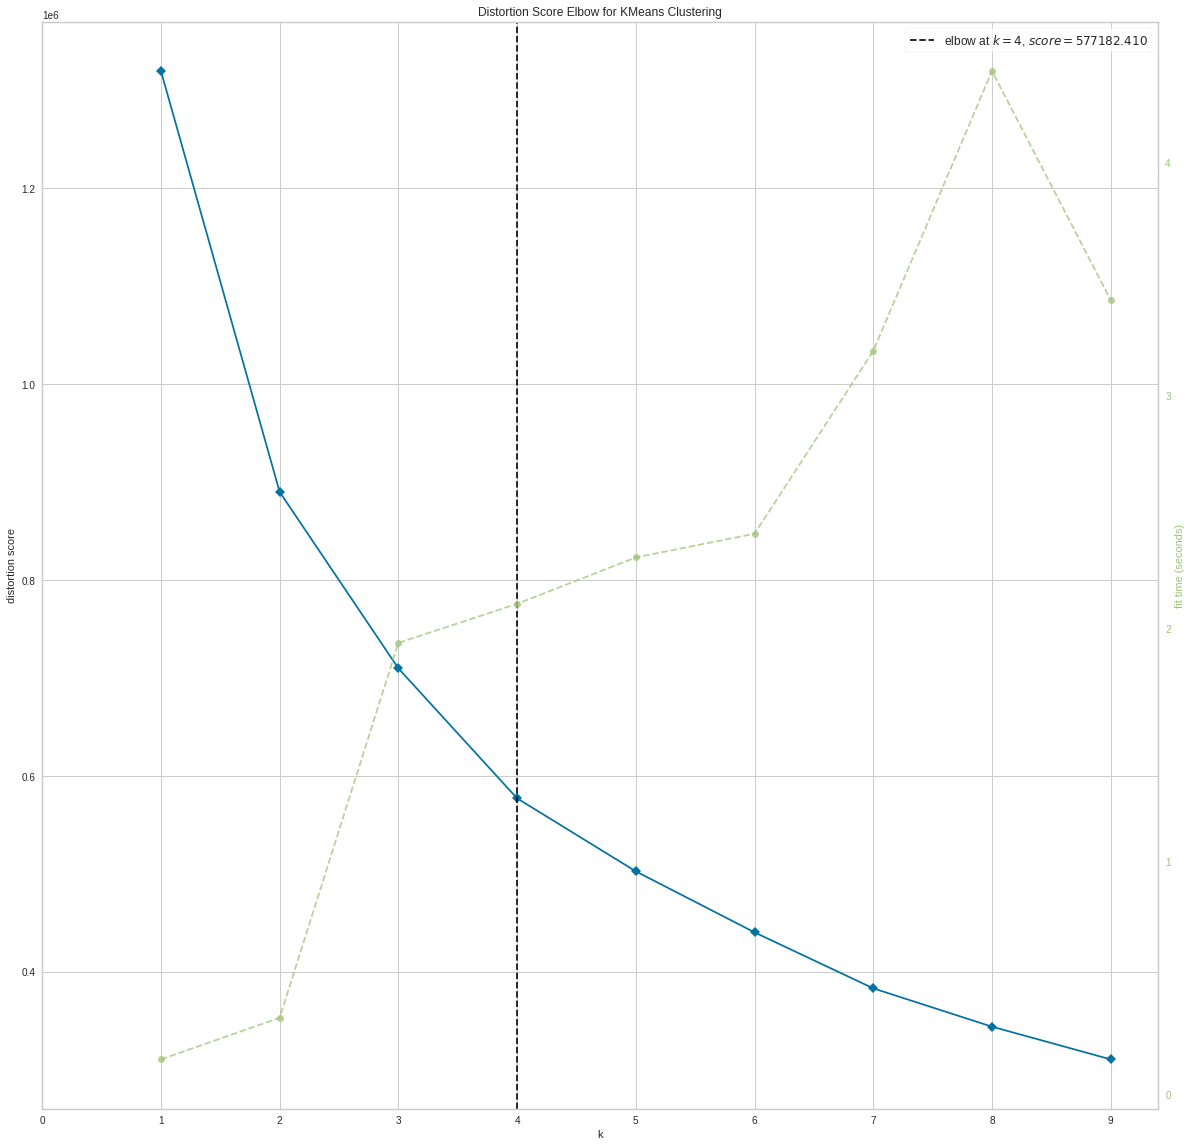

In [6]:
#     # ELBOW PLOT START

fig, ax = plt.subplots(1, 1, figsize = (20,20))
plt.subplots_adjust(hspace=0.5)
fig.patch.set_facecolor('w')
visualizer = KElbowVisualizer(KMeans(), k=(1,10),ax=ax)
visualizer.fit(df_std)

ax.set_xticks(range(0,10))
visualizer.show()
plt.show()

fig_dir = ('figs/cluster/')
isdir = os.path.isdir(fig_dir)
if isdir == False:
    os.makedirs(fig_dir)
    
file_name = 'KMeans_elbow.png'

fig.savefig(fig_dir + file_name)

# # ELBOW PLOT END

#     plt.show()    

100%|██████████| 5/5 [38:49<00:00, 465.88s/it]


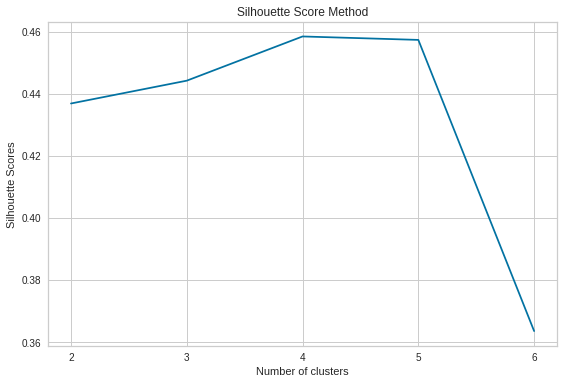

In [7]:

silhouette_scores = []
for k in tqdm(range(2, 7)):
    km = KMeans(n_clusters=k, 
                max_iter=100, 
                tol=1e-04, 
                init='k-means++', 
                n_init=10, 
                random_state=42, 
                algorithm='auto')
    km.fit(df_std)
    silhouette_scores.append(silhouette_score(df_std, km.labels_))

fig, ax = plt.subplots()
ax.plot(range(2, 7), silhouette_scores, 'bx-')
ax.set_title('Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Scores')
plt.xticks(range(2, 7))
plt.tight_layout()
plt.show()

fig_dir = ('figs/cluster/')
isdir = os.path.isdir(fig_dir)
if isdir == False:
    os.makedirs(fig_dir)
    
file_name = 'KMeans_silhouette_score.png'

fig.savefig(fig_dir + file_name)

100%|██████████| 5/5 [1:14:27<00:00, 893.58s/it]


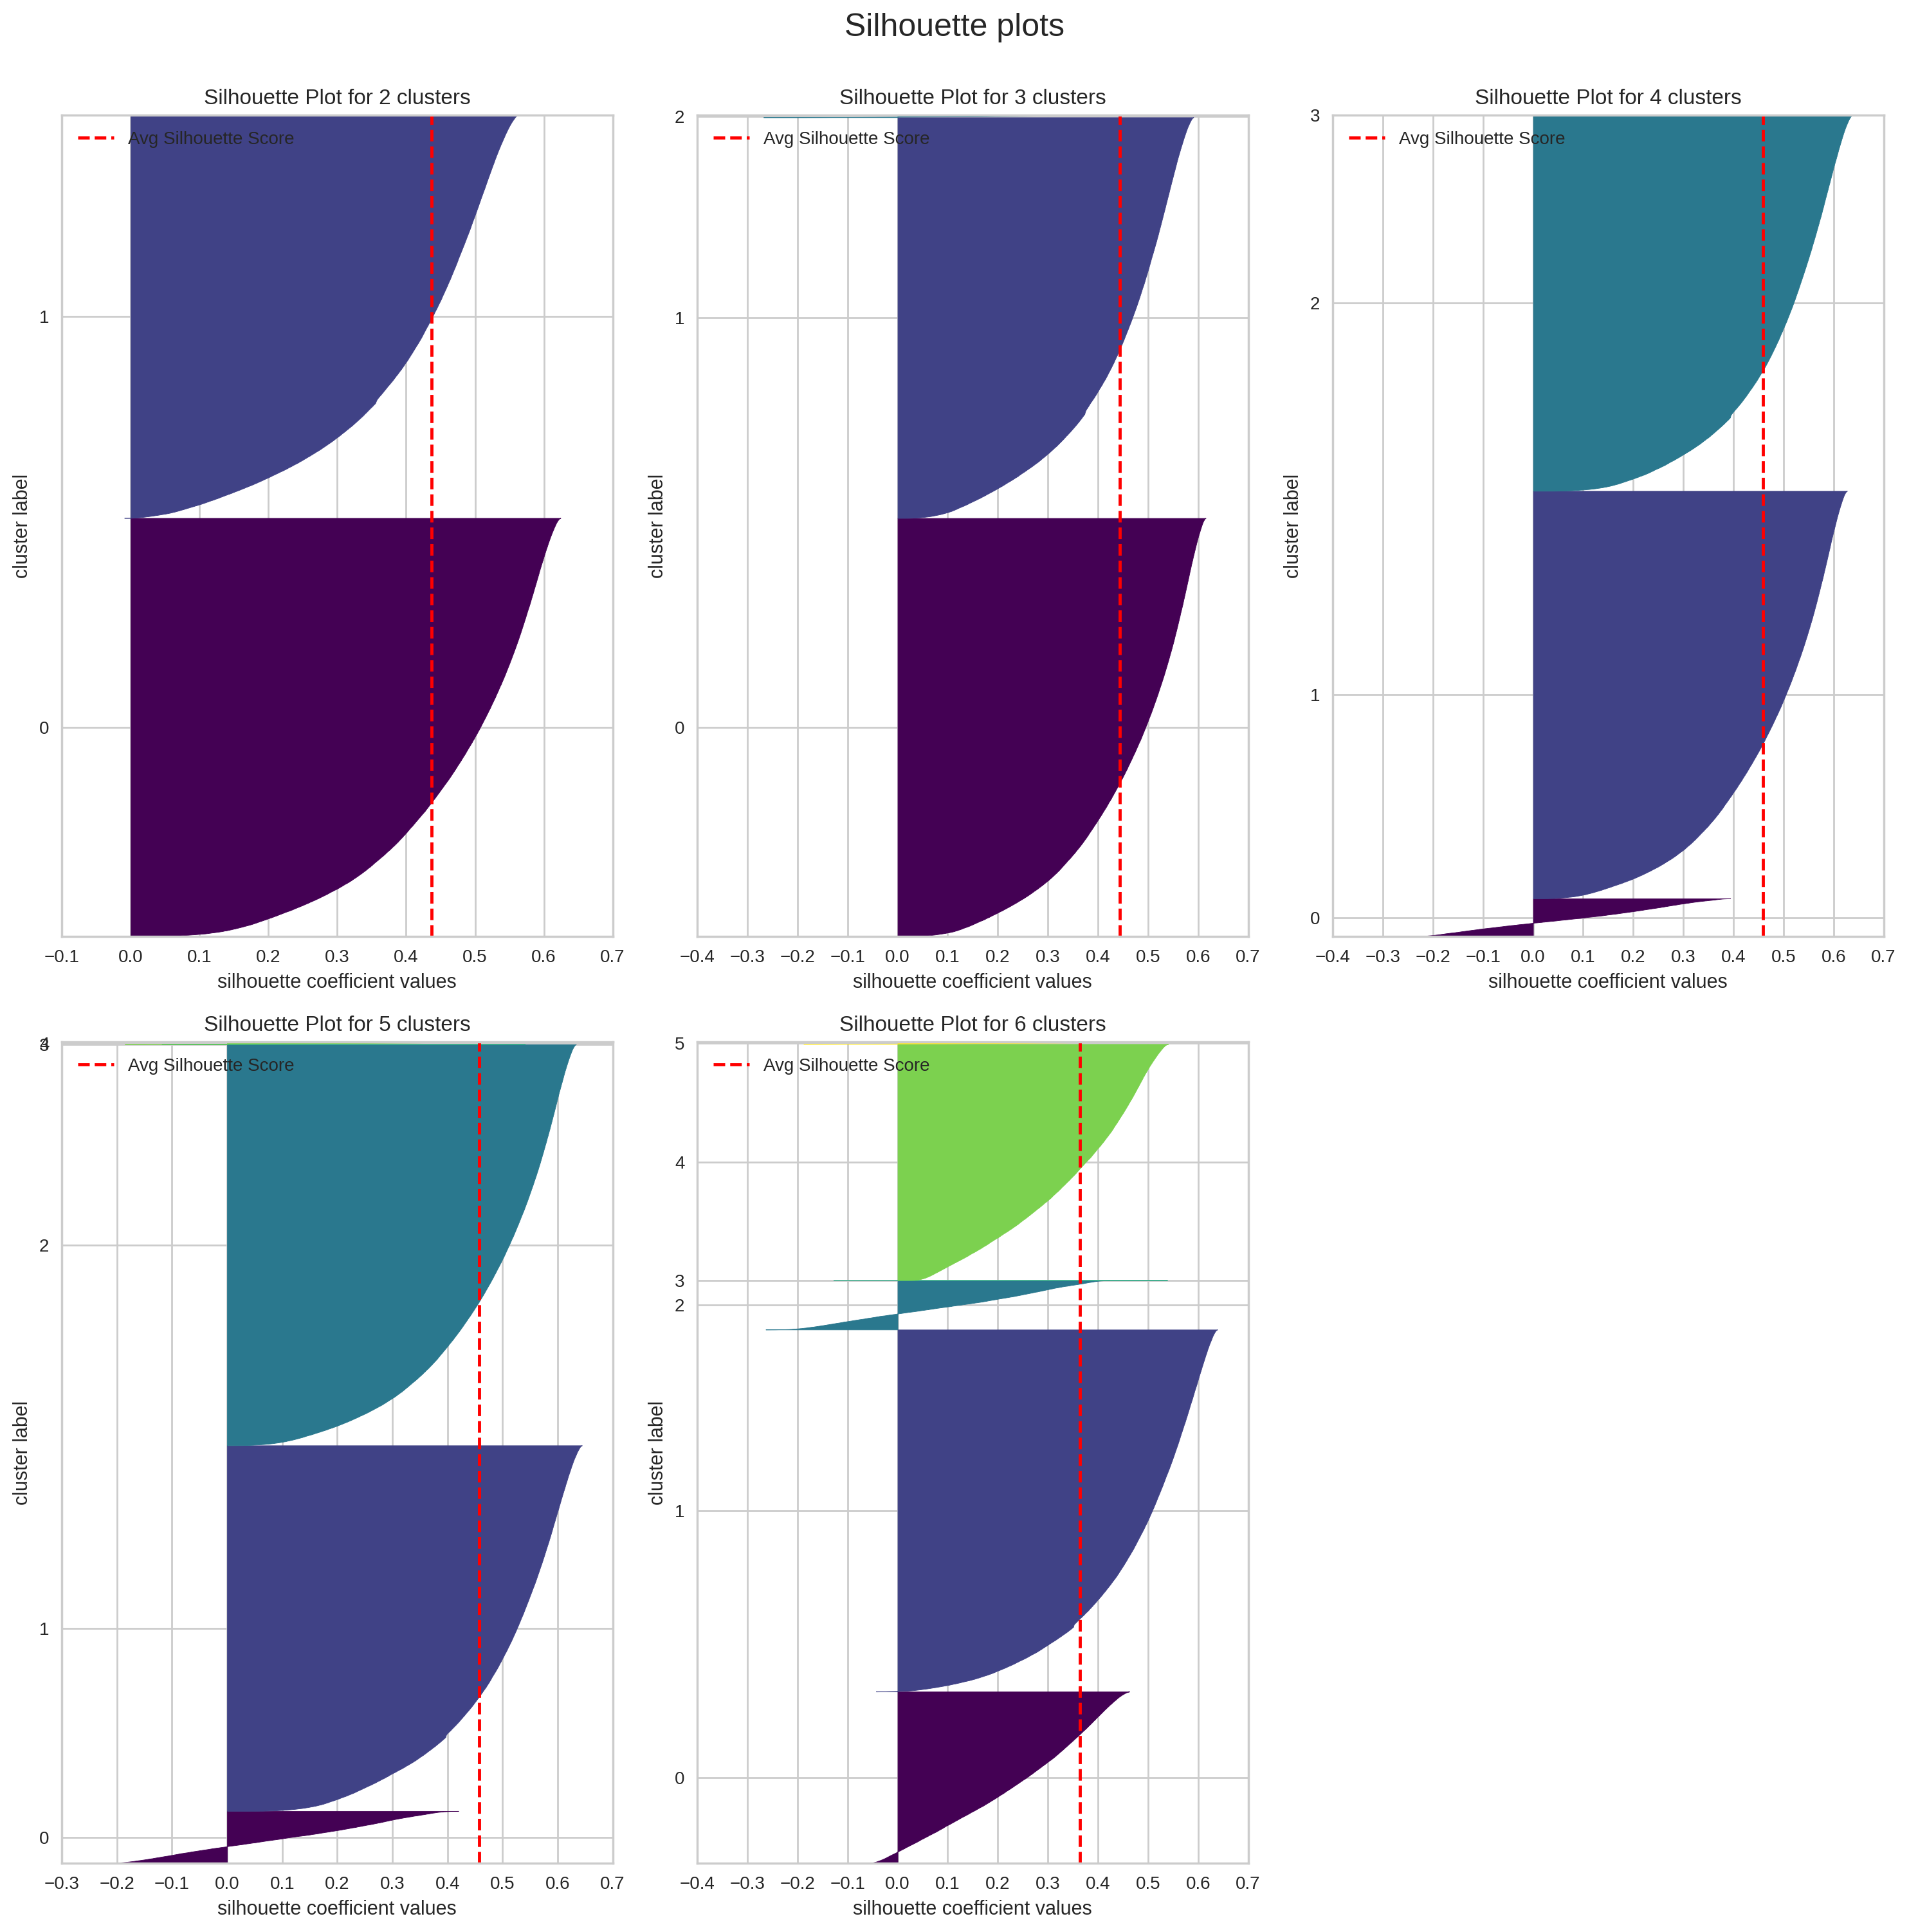

In [10]:
# Plot for multiple ks
colors = gl.color_grabber(
    n_colors = 6,
    color_map = 'viridis'
)

k_max = 6
ncols = 3
# calculate number of rows
nrows = k_max // ncols + (k_max % ncols > 0)
# set figure size
fig = plt.figure(figsize=(15,15), dpi=200)

for k in tqdm(range(2,k_max+1)):

    # Apply clustering for k clusters
    km = KMeans(n_clusters=k, 
                max_iter=100, 
                tol=1e-04, 
                init='k-means++', 
                n_init=10, 
                random_state=42, 
                algorithm='auto')



    # create chart
    km_fit = km.fit(df_std)
    ax = plt.subplot(nrows, ncols, k-1)
    gl.silhouette_plot(df_std, km_fit, ax, colors)
fig.suptitle('Silhouette plots', fontsize=18, y=1)
plt.tight_layout()
plt.show()


fig_dir = ('figs/cluster/')
isdir = os.path.isdir(fig_dir)
if isdir == False:
    os.makedirs(fig_dir)
    
file_name = 'KMeans_silhouette_plot.png'

fig.savefig(fig_dir + file_name)

In [41]:
selected_n = 4
# Final decision
km = KMeans(n_clusters = selected_n, 
            max_iter = 300, 
            tol = 1e-04, 
            init = 'k-means++', 
            n_init = 10, 
            random_state = 42, 
            algorithm = 'auto')

km_fit = km.fit(df_std)
df_std['cluster'] = km_fit.predict(df_std)
RGI['cluster'] = df_std['cluster']


colors = gl.color_grabber(
    n_colors = selected_n ,
    color_map = 'viridis'
)

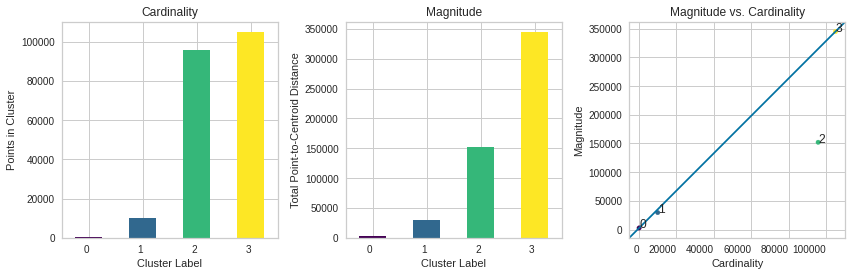

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 4))

plot_cluster_cardinality(km_fit.labels_,
                         ax = ax1,
                         title = "Cardinality",
                         color = colors.iloc[0:km_fit.n_clusters]
                        )
plot_cluster_magnitude(df_std,
                       km_fit.labels_,
                       km_fit.cluster_centers_,
                       euclidean,
                       ax = ax2,
                       title = "Magnitude",
                       color = colors.iloc[0:km_fit.n_clusters]
                      )
plot_magnitude_vs_cardinality(df_std,
                              km_fit.labels_,
                              km_fit.cluster_centers_,
                              euclidean,
                              color = colors.iloc[0:km_fit.n_clusters],
                              ax = ax3, 
                              title = "Magnitude vs. Cardinality")

fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()
fig_dir = ('figs/cluster/')
isdir = os.path.isdir(fig_dir)
if isdir == False:
    os.makedirs(fig_dir)
    
file_name = 'KMeans_mag_vs_card_n_' + str(len(colors)) + '.png'

fig.savefig(fig_dir + file_name)

fitting...


3it [00:00, 639.38it/s]

embedding...



/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/pacmap/pacmap.py:774: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')
3it [00:00, 308.33it/s]


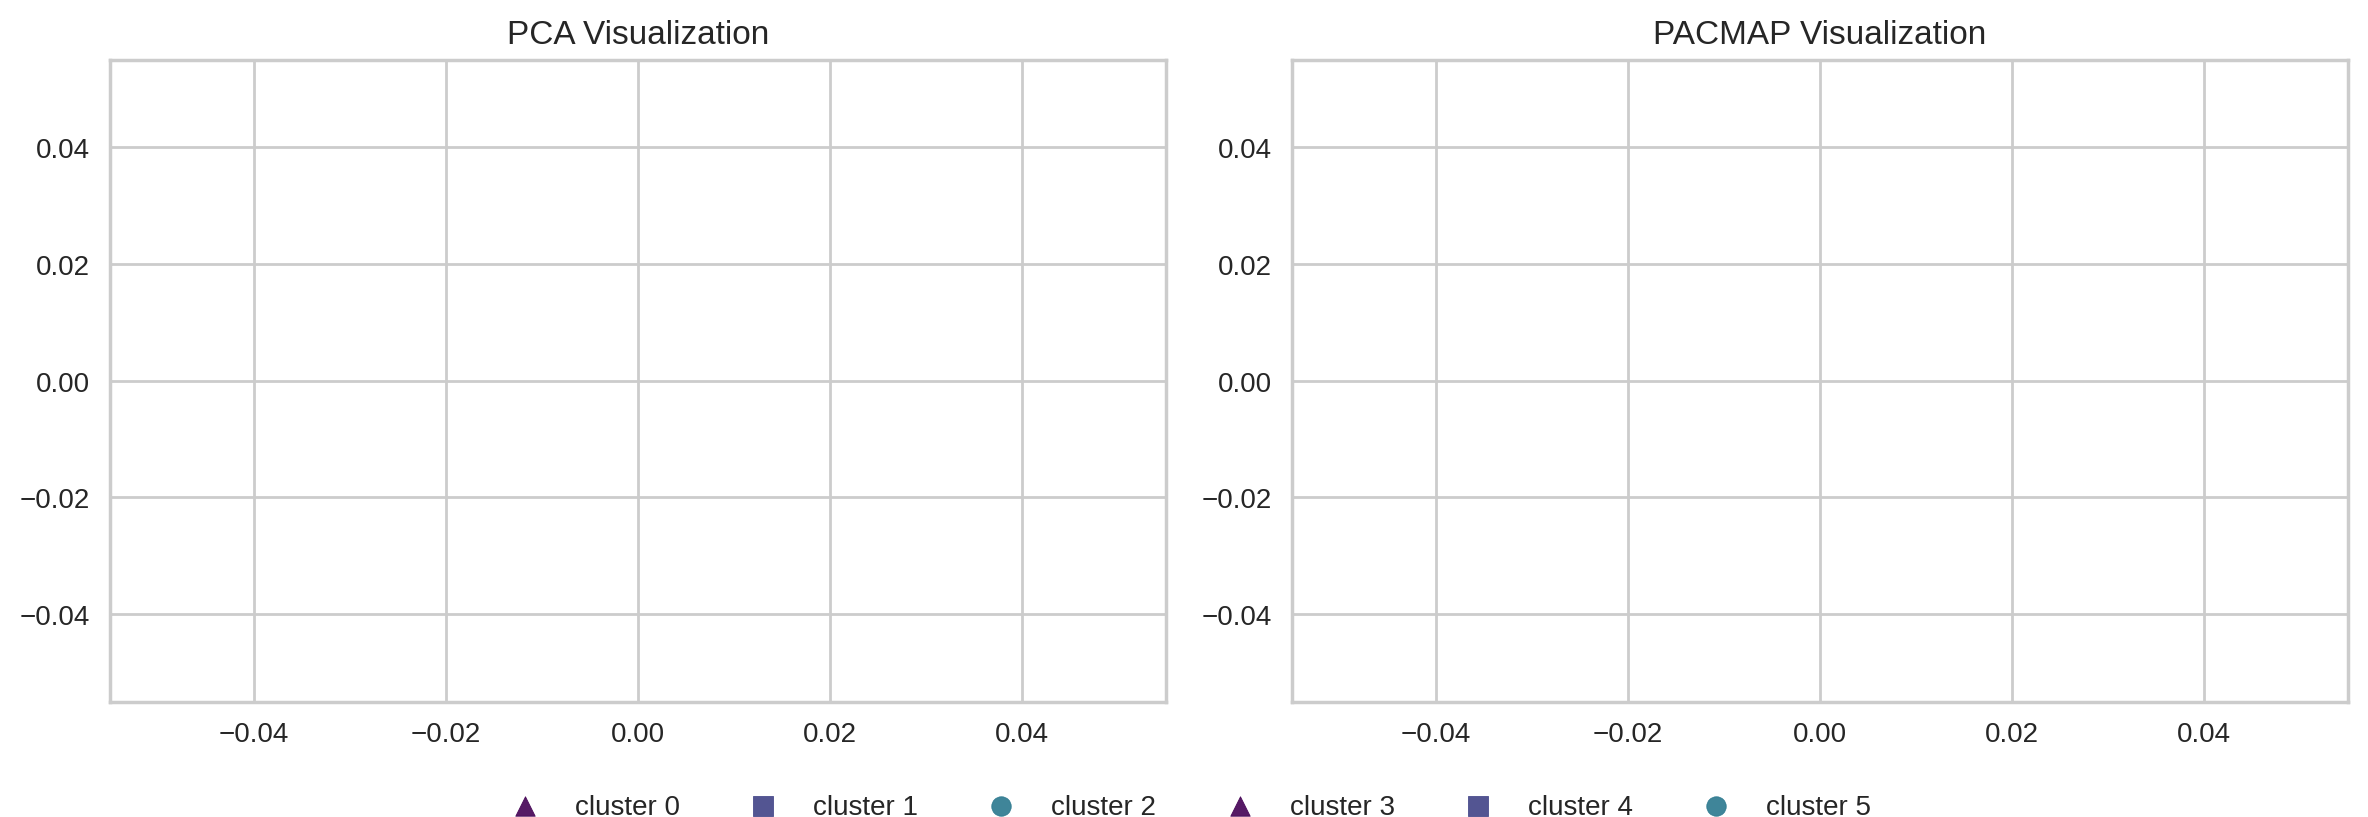

NameError: name 'n_colors' is not defined

In [14]:
# Visualizing pca and pacmap

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4), dpi = 200)

# PCA
pca_scaled_std = PCA(n_components = 6, random_state = 42)
print('fitting...')
df_std_pca = pca_scaled_std.fit_transform(df_std)

for l, c, m in tqdm(
    zip(range(0, 3), colors[0:km_fit.n_clusters], ('^', 's', 'o'))
):
    ax1.scatter(df_std_pca[km_fit == l, 0],
                df_std_pca[km_fit == l, 1],
                c = c,
                label = 'cluster %s' % l,
                alpha = 0.9,
                marker = m
                )

# PACMAP
embedding = pacmap.PaCMAP(random_state = 42)
print('embedding...')
df_std_pacmap = embedding.fit_transform(df_std.to_numpy())

for l, c, m in tqdm(
    zip(range(0, 3), colors[0:km_fit.n_clusters], ('^', 's', 'o'))
):
    ax2.scatter(df_std_pacmap[km_fit == l, 0],
                df_std_pacmap[km_fit == l, 1],
#                     test_df_pacmap[df['cluster'] == l, 2],
                c = c,
                label = 'cluster %s' % l,
                alpha = 0.9,
                marker = m
                )

ax1.set_title("PCA Visualization")
ax2.set_title("PACMAP Visualization")

labels = np.unique(km_fit.labels_)
labels = ["cluster "+str(l) for l in labels]
fig.legend(
    labels, loc = 'lower center', ncol=len(labels), 
    bbox_transform = (1,0), borderaxespad = -0.5)
plt.tight_layout()
plt.show()

fig_dir = ('figs/cluster/')
isdir = os.path.isdir(fig_dir)
if isdir == False:
    os.makedirs(fig_dir)
    
file_name = 'KMeans_pca_pacmap_n_' + str(n_colors) + '.png'

fig.savefig(fig_dir + file_name)

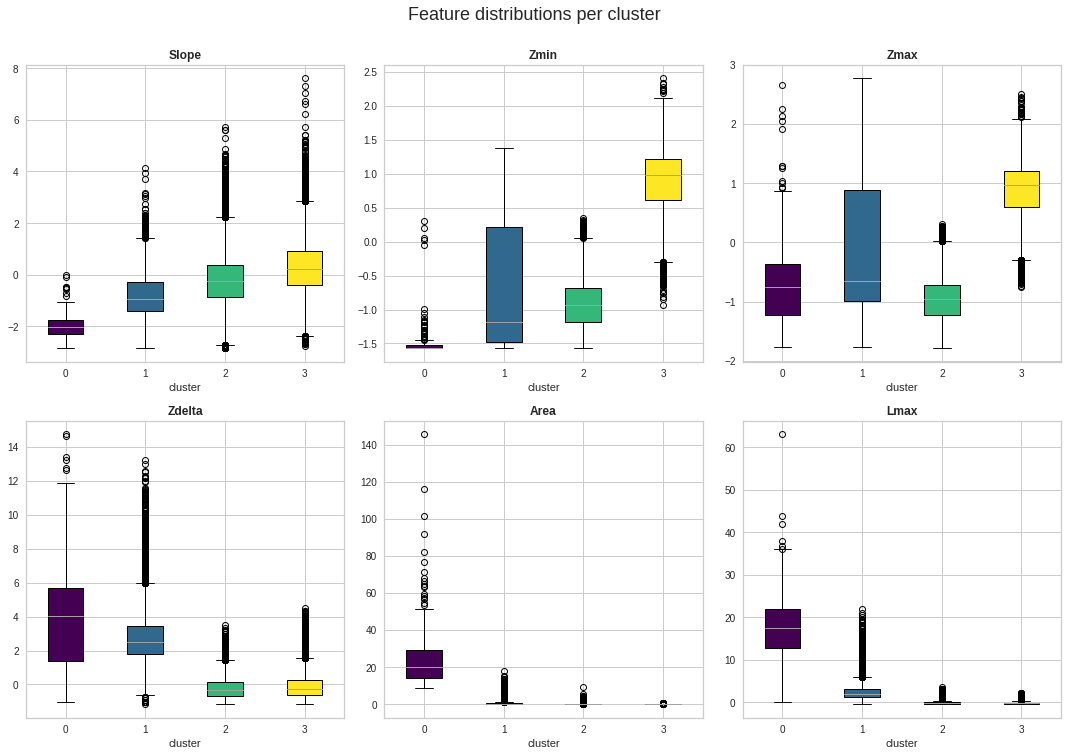

In [43]:
features = df_std[[
#     'CenLat',
#     'CenLon',
    'Slope',
    'Zmin',
#     'Zmed',
    'Zmax',
    'Zdelta',
    'Area',
#     'Aspect',
    'Lmax',
    
]]
ncols = 3
nrows = 3
fig = plt.figure(figsize=(15,15))

for n, feature in enumerate(features):
    ax = plt.subplot(nrows, ncols, n + 1)
    box = df_std[[
        feature, 'cluster'
    ]].boxplot(
        by = 'cluster',
        ax = ax,
        return_type = 'both',
        patch_artist = True
    )

    for row_key, (ax,row) in box.iteritems():
        ax.set_xlabel('cluster')
        ax.set_title(feature,fontweight="bold")
        for i,box in enumerate(row['boxes']):
            box.set_facecolor(colors[i])

fig.suptitle('Feature distributions per cluster', fontsize=18, y=1)   
plt.tight_layout()
plt.show()

fig_dir = ('figs/cluster/')
isdir = os.path.isdir(fig_dir)
if isdir == False:
    os.makedirs(fig_dir)
    
file_name = 'KMeans_features_distribution_n_' + str(len(colors)) + '.png'

fig.savefig(fig_dir + file_name)

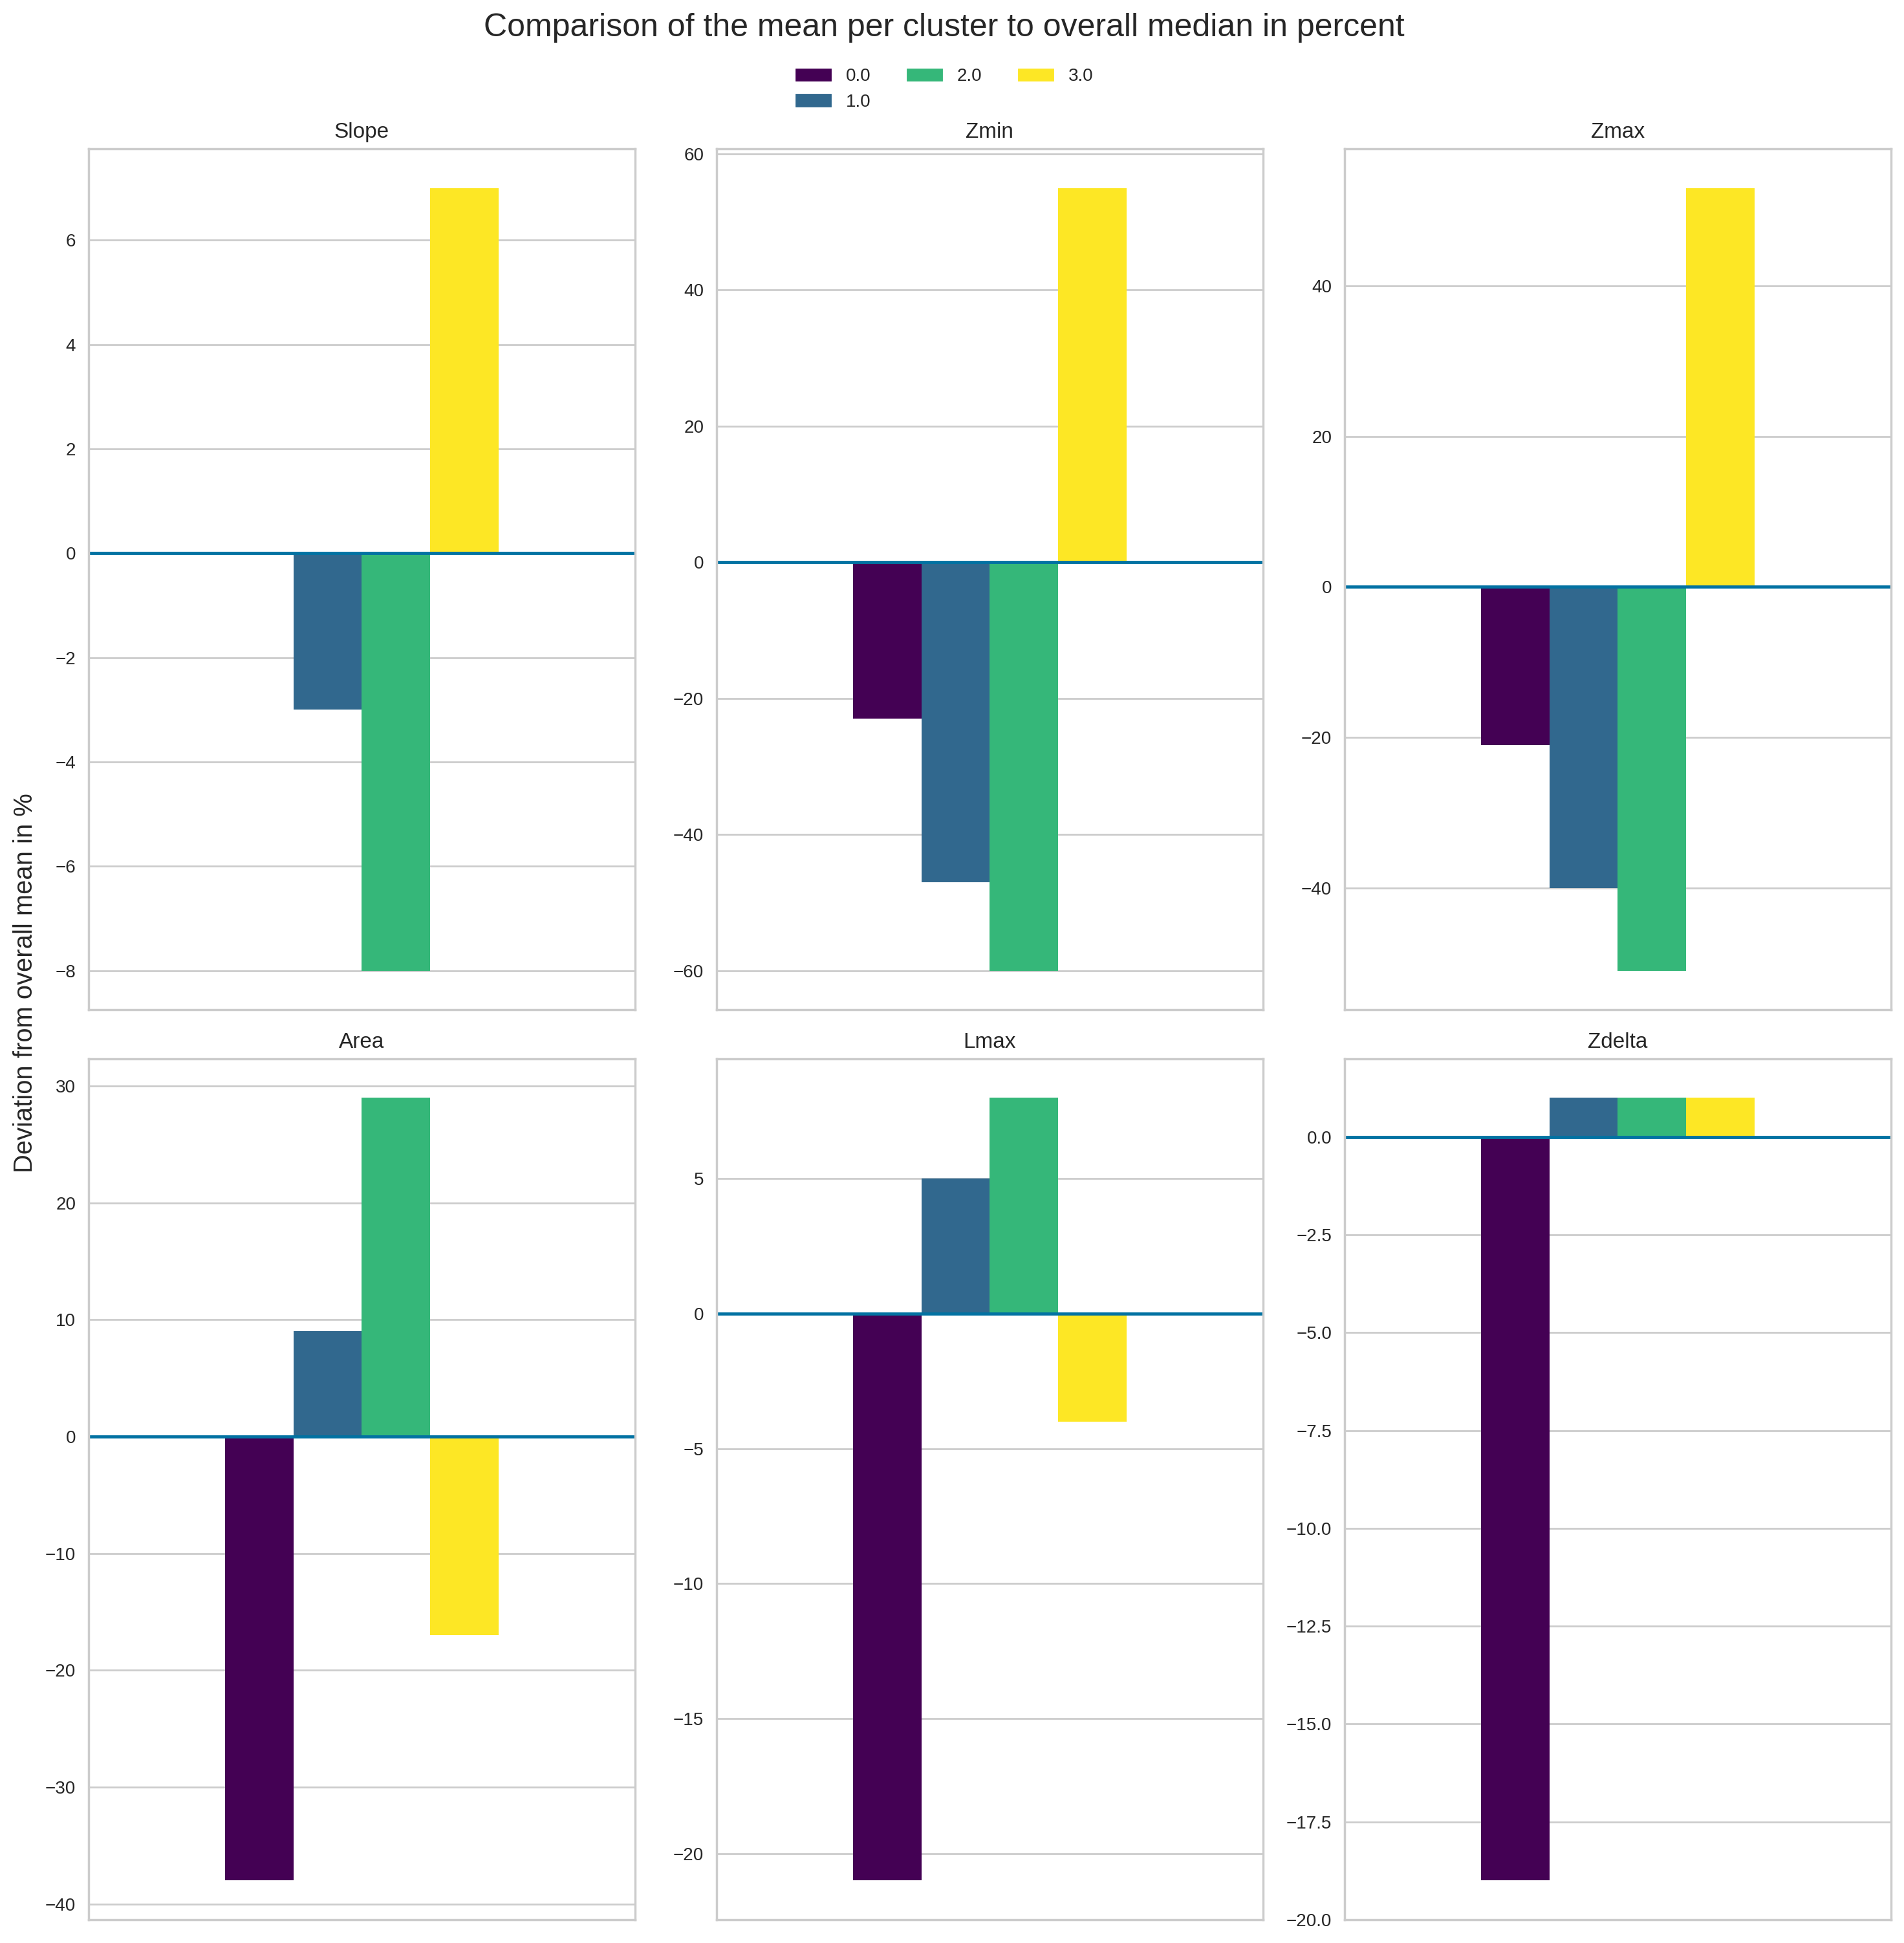

In [53]:

RGI_median = pd.concat([pd.DataFrame(RGI.median().drop('cluster'), columns=['median']), 
                   RGI.groupby('cluster').median().T], axis=1)

RGI_dev_rel = RGI_median.apply(lambda x: round((x-x['median'])/x['median'],2)*100, axis = 1)
RGI_dev_rel.drop(columns=['median'], inplace=True)
RGI_median.drop(columns=['median'], inplace=True)

df_std_median = pd.concat([pd.DataFrame(df_std.median().drop('cluster'), columns=['median']), 
                   df_std.groupby('cluster').median().T], axis=1)

df_std_dev_rel = df_std_median.apply(
    lambda x: round((x-x['median'])/x['median'],2)*100, axis = 1
)
df_std_dev_rel.drop(columns=['median'], inplace=True)
df_std_median.drop(columns=['median'], inplace=True)


    
gl.cluster_comparison_bar(
    df_std,
    RGI_dev_rel, 
    colors, 
    title="Comparison of the mean per cluster to overall median in percent"
)


fig_dir = ('figs/cluster/')
isdir = os.path.isdir(fig_dir)
if isdir == False:
    os.makedirs(fig_dir)
    
file_name = 'KMeans_comparison_bar_median_n_' + str(len(colors)) + '.png'

fig.savefig(fig_dir + file_name)


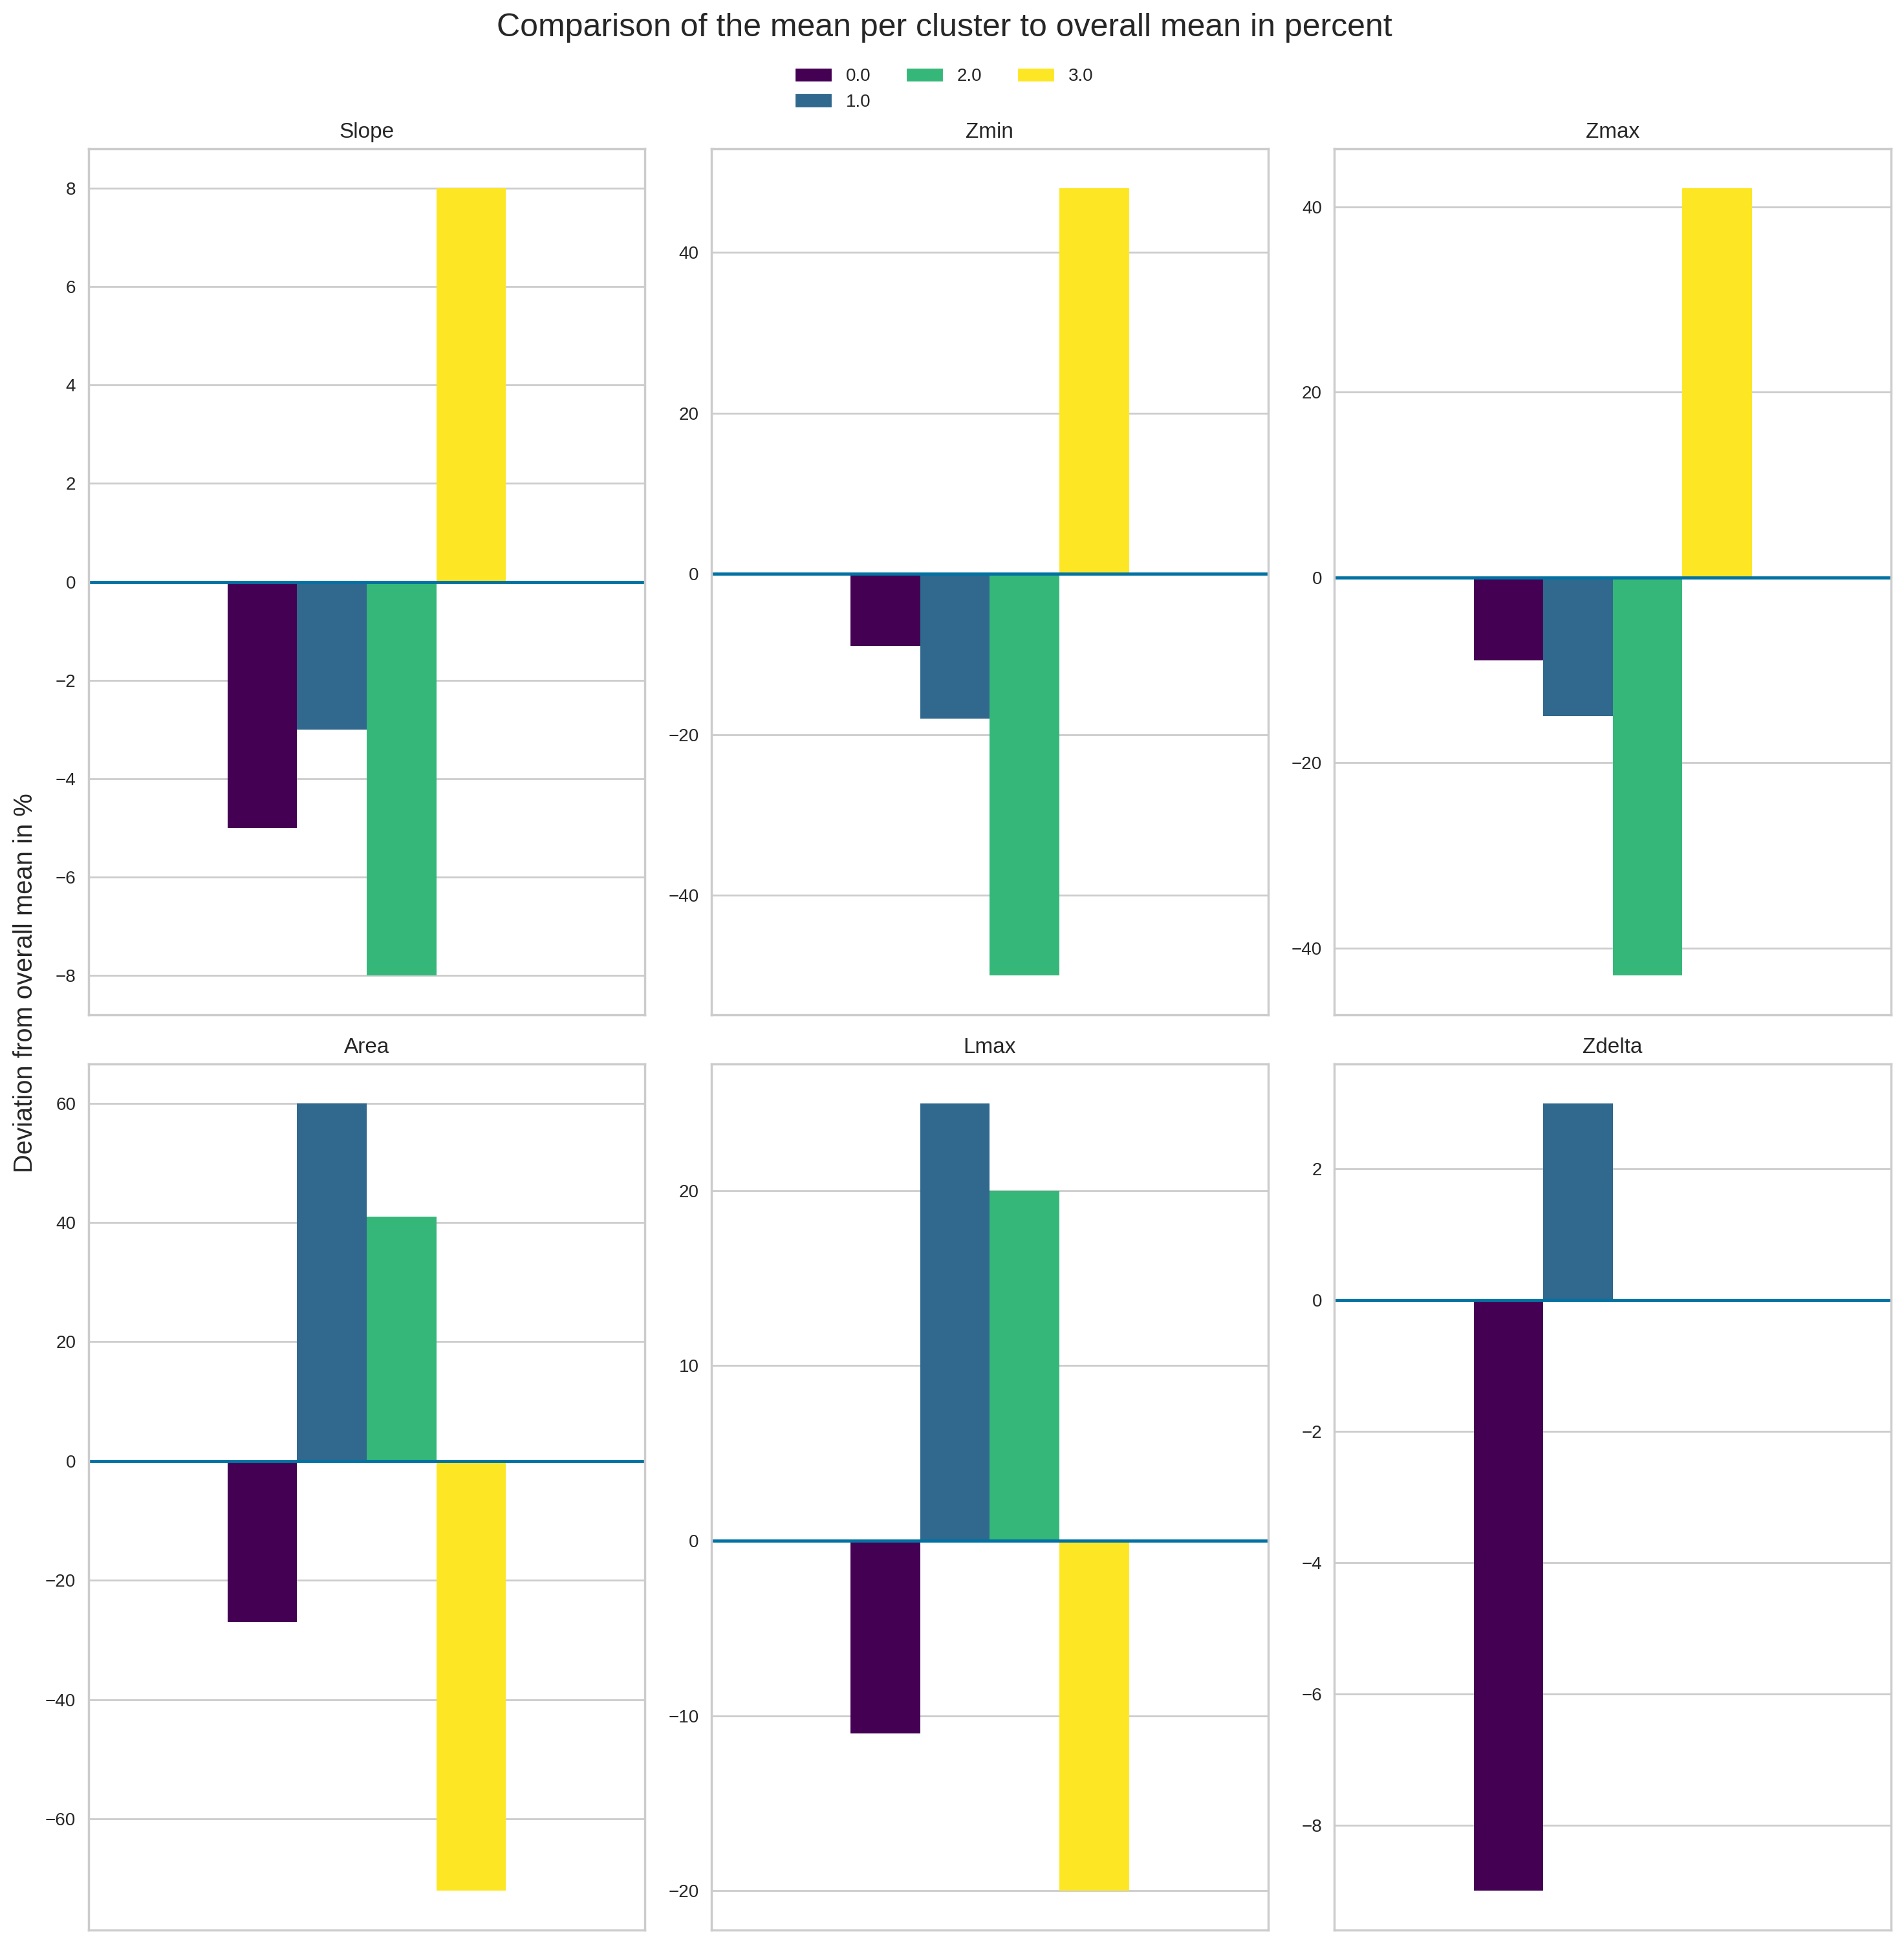

In [54]:

RGI_mean = pd.concat([pd.DataFrame(RGI.mean().drop('cluster'), columns=['mean']), 
                   RGI.groupby('cluster').mean().T], axis=1)

RGI_dev_rel = RGI_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
RGI_dev_rel.drop(columns=['mean'], inplace=True)
RGI_mean.drop(columns=['mean'], inplace=True)

df_std_mean = pd.concat([pd.DataFrame(df_std.mean().drop('cluster'), columns=['mean']), 
                   df_std.groupby('cluster').mean().T], axis=1)

df_std_dev_rel = df_std_mean.apply(
    lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1
)
df_std_dev_rel.drop(columns=['mean'], inplace=True)
df_std_mean.drop(columns=['mean'], inplace=True)


    
gl.cluster_comparison_bar(
    df_std,
    RGI_dev_rel, 
    colors, 
    title="Comparison of the mean per cluster to overall mean in percent"
)


fig_dir = ('figs/cluster/')
isdir = os.path.isdir(fig_dir)
if isdir == False:
    os.makedirs(fig_dir)
    
file_name = 'KMeans_comparison_bar_mean_n_' + str(len(colors)) + '.png'

fig.savefig(fig_dir + file_name)


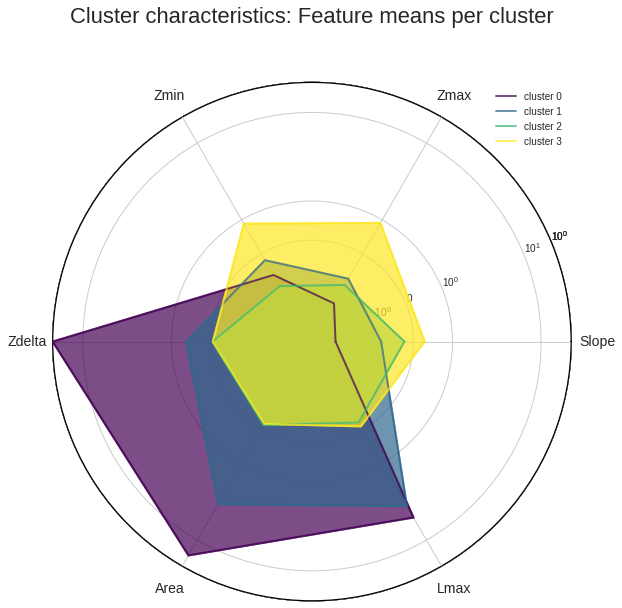

In [55]:


fig = plt.figure(figsize=(8, 8))
no_features = 5
radar = gl.Radar(fig, [
    'Slope', 'Zmax', 'Zmin', 'Zdelta', 'Area', 'Lmax',
], np.unique(km.labels_))

for k in range(0,km.n_clusters):
    cluster_data = df_std_mean[k].values.tolist()
    radar.plot(
        cluster_data, 
        '-', 
        lw = 2,
        color = colors[k],
        alpha = 0.7, 
        label = 'cluster {}'.format(k)
    )

radar.ax.legend()
radar.ax.set_title("Cluster characteristics: Feature means per cluster", size=22, pad=60)
plt.show()


fig_dir = ('figs/cluster/')
isdir = os.path.isdir(fig_dir)
if isdir == False:
    os.makedirs(fig_dir)
    
file_name = 'KMeans_radar_n_' + str(len(colors)) + '.png'

fig.savefig(fig_dir + file_name)

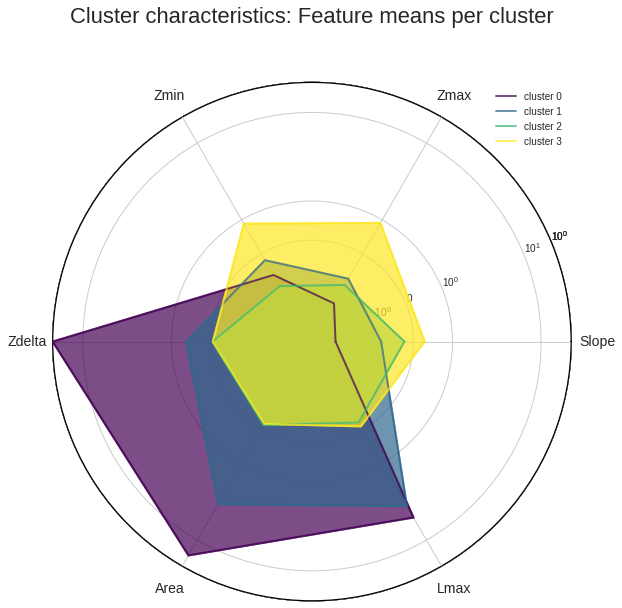

In [50]:


fig = plt.figure(figsize=(8, 8))
no_features = 5
radar = gl.Radar(fig, [
    'Slope', 'Zmax', 'Zmin', 'Zdelta', 'Area', 'Lmax',
], np.unique(km.labels_))

for k in range(0,km.n_clusters):
    cluster_data = df_std_mean[k].values.tolist()
    radar.plot(
        cluster_data, 
        '-', 
        lw = 2,
        color = colors[k],
        alpha = 0.7, 
        label = 'cluster {}'.format(k)
    )

radar.ax.legend()
radar.ax.set_title("Cluster characteristics: Feature means per cluster", size=22, pad=60)
plt.show()


fig_dir = ('figs/cluster/')
isdir = os.path.isdir(fig_dir)
if isdir == False:
    os.makedirs(fig_dir)
    
file_name = 'KMeans_radar_n_' + str(len(colors)) + '.png'

fig.savefig(fig_dir + file_name)

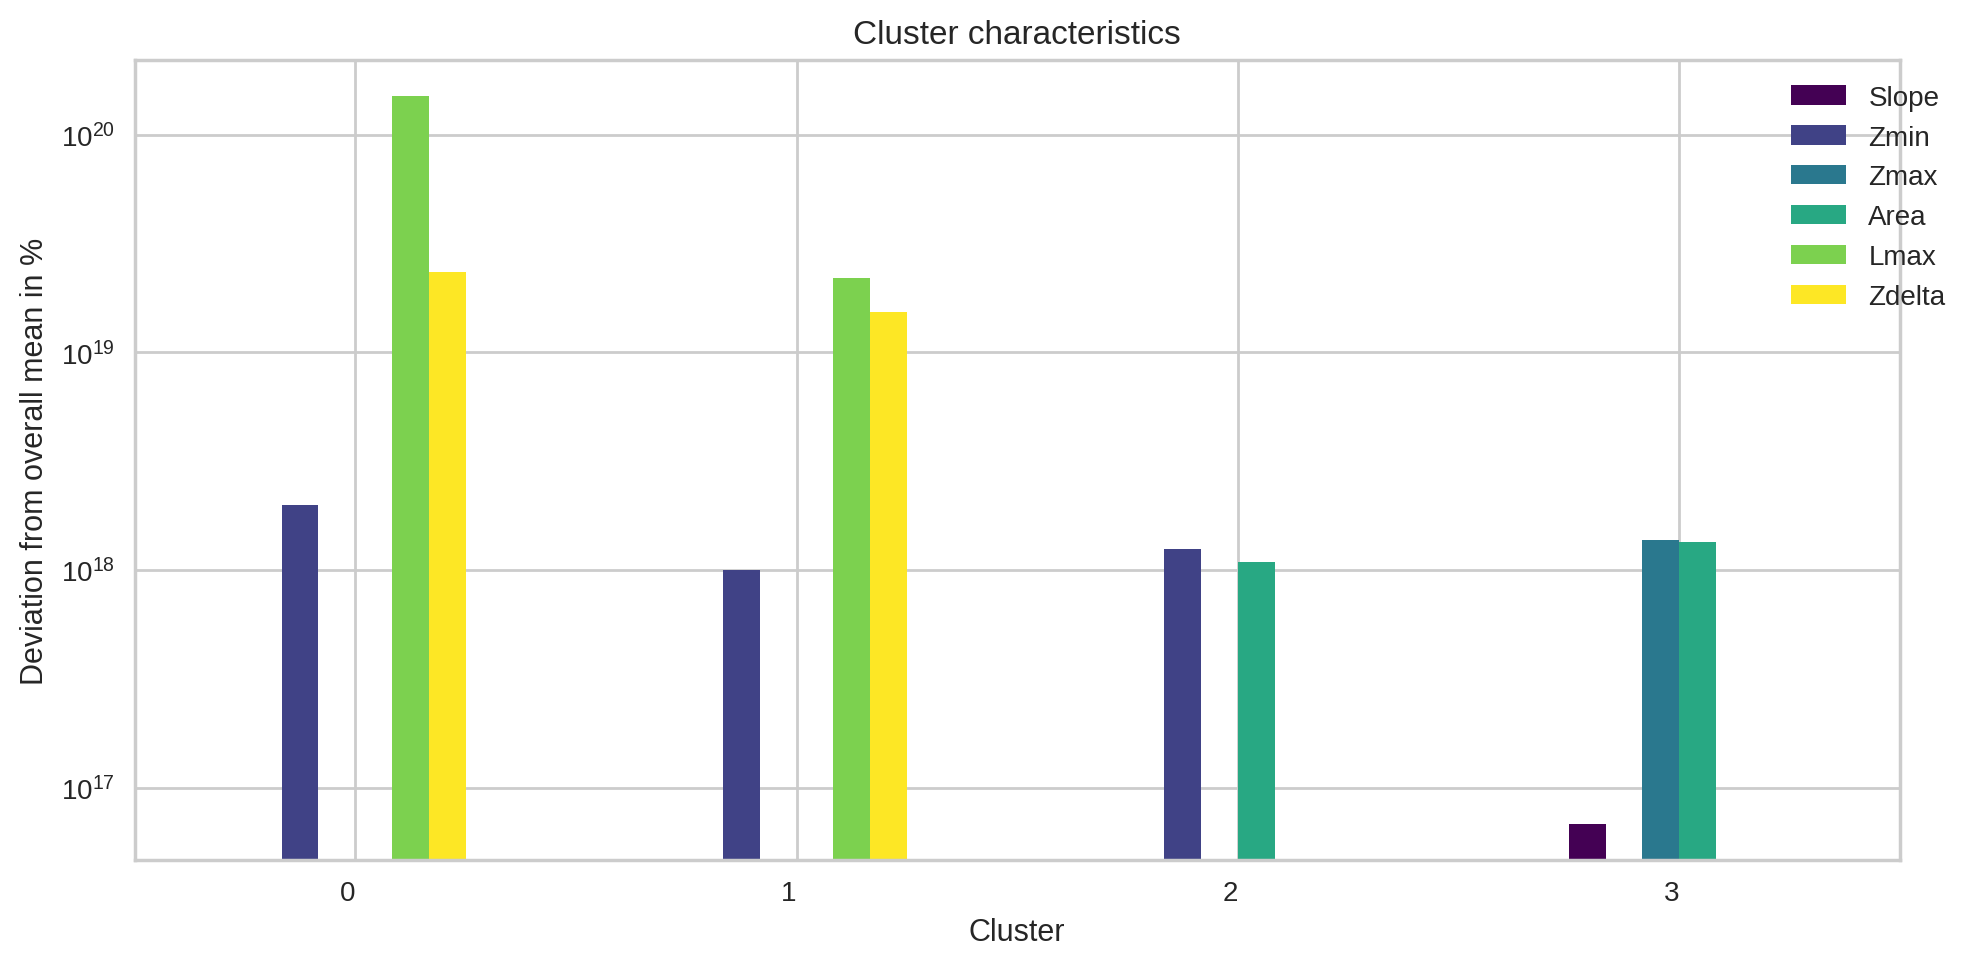

In [47]:
colors_d = gl.color_grabber(
    n_colors = 6,
    color_map = 'viridis'
)

fig = plt.figure(figsize=(10,5), dpi=200)
df_std_dev_rel.T.plot(kind='bar', 
                       ax=fig.add_subplot(), 
                       title="Cluster characteristics", 
                       color=colors_d,
                       xlabel="Cluster",
                       ylabel="Deviation from overall mean in %"
                      )
plt.axhline(y=0, linewidth=1, ls='--', color='black')
plt.legend(bbox_to_anchor=(1.04,1))
fig.autofmt_xdate(rotation=0)
plt.yscale('log')
plt.tight_layout()
plt.show()

fig_dir = ('figs/cluster/')
isdir = os.path.isdir(fig_dir)
if isdir == False:
    os.makedirs(fig_dir)
    
file_name = 'KMeans_mean_deviation_n_' + str(len(colors)) + '.png'

fig.savefig(fig_dir + file_name)

In [ ]:
ccccombo_breaker()
# past this point is under construction. 
# here be monsters

In [ ]:
# # full loop for all figs excluding elbow and silhouettes
# for n in range(2, 7, 1):
#     RGI = gl.RGI_loader()

#     RGI = RGI[[
#     #     'CenLat',
#     #     'CenLon',
#         'Slope',
#         'Zmin',
#     #     'Zmed',
#         'Zmax',
#         'Area',
#         # 'Aspect',
#         'Lmax'
#     ]]
#     drops = RGI[

# #         (RGI[# 'Aspect'] < 0) | 
#         (RGI['Zmin'] < 0) |
#         (RGI['Zmax'] < 0) |
#         (RGI['Lmax'] < 0) 

#     ].index
#     RGI = RGI.drop(drops)
#     RGI['Zdelta'] = RGI['Zmax'] - RGI['Zmin']

#     scaler = StandardScaler()
#     RGI_std = scaler.fit_transform(RGI)
#     df_std = pd.DataFrame(RGI_std, columns = RGI.columns)
#     dft_std = scaler.fit_transform(RGI)
#     km = KMeans(n_clusters=n, 
#                 max_iter=300, 
#                 tol=1e-04, 
#                 init='k-means++', 
#                 n_init=10, 
#                 random_state=42, 
#                 algorithm='auto')

#     km_fit = km.fit(df_std)
#     df_std['cluster'] = km_fit.predict(df_std)
#     RGI['cluster'] = df_std['cluster']


#     # Final decision
#     km = KMeans(n_clusters = n, 
#                 max_iter = 300, 
#                 tol = 1e-04, 
#                 init = 'k-means++', 
#                 n_init = 10, 
#                 random_state = 42, 
#                 algorithm = 'auto')

#     km_fit = km.fit(df_std)
#     df_std['cluster'] = km_fit.predict(df_std)
#     RGI['cluster'] = df_std['cluster']


#     colors = gl.color_grabber(
#         n_colors = n,
#         color_map = 'viridis'
#     )
    
#     fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 4))

#     plot_cluster_cardinality(km_fit.labels_,
#                              ax = ax1,
#                              title = "Cardinality",
#                              color = colors.iloc[0:km_fit.n_clusters]
#                             )
#     plot_cluster_magnitude(df_std,
#                            km_fit.labels_,
#                            km_fit.cluster_centers_,
#                            euclidean,
#                            ax = ax2,
#                            title = "Magnitude",
#                            color = colors.iloc[0:km_fit.n_clusters]
#                           )
#     plot_magnitude_vs_cardinality(df_std,
#                                   km_fit.labels_,
#                                   km_fit.cluster_centers_,
#                                   euclidean,
#                                   color = colors.iloc[0:km_fit.n_clusters],
#                                   ax = ax3, 
#                                   title = "Magnitude vs. Cardinality")

#     fig.autofmt_xdate(rotation=0)
#     plt.tight_layout()
#     plt.show()
#     fig_dir = ('figs/cluster/')
#     isdir = os.path.isdir(fig_dir)
#     if isdir == False:
#         os.makedirs(fig_dir)

#     file_name = 'KMeans_mag_vs_card_n_' + str(len(colors)) + '.png'

#     fig.savefig(fig_dir + file_name)


#     features = df_std[[
#     #     'CenLat',
#     #     'CenLon',
#         'Slope',
#         'Zmin',
#     #     'Zmed',
#         'Zmax',
#         'Zdelta',
#         'Area',
#     #     'Aspect',
#         'Lmax',

#     ]]
#     ncols = 3
#     nrows = 3
#     fig = plt.figure(figsize=(15,15))

#     for n, feature in enumerate(features):
#         ax = plt.subplot(nrows, ncols, n + 1)
#         box = df_std[[
#             feature, 'cluster'
#         ]].boxplot(
#             by = 'cluster',
#             ax = ax,
#             return_type = 'both',
#             patch_artist = True
#         )

#         for row_key, (ax,row) in box.iteritems():
#             ax.set_xlabel('cluster')
#             ax.set_title(feature,fontweight="bold")
#             for i,box in enumerate(row['boxes']):
#                 box.set_facecolor(colors[i])

#     fig.suptitle('Feature distributions per cluster', fontsize=18, y=1)   
#     plt.tight_layout()
#     plt.show()

#     fig_dir = ('figs/cluster/')
#     isdir = os.path.isdir(fig_dir)
#     if isdir == False:
#         os.makedirs(fig_dir)

#     file_name = 'KMeans_features_distribution_n_' + str(len(colors)) + '.png'

#     fig.savefig(fig_dir + file_name)
    
    
#     RGI_mean = pd.concat([pd.DataFrame(RGI.mean().drop('cluster'), columns=['mean']), 
#                    RGI.groupby('cluster').mean().T], axis=1)

#     RGI_dev_rel = RGI_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
#     RGI_dev_rel.drop(columns=['mean'], inplace=True)
#     RGI_mean.drop(columns=['mean'], inplace=True)

#     df_std_mean = pd.concat([pd.DataFrame(df_std.mean().drop('cluster'), columns=['mean']), 
#                        df_std.groupby('cluster').mean().T], axis=1)

#     df_std_dev_rel = df_std_mean.apply(
#         lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1
#     )
#     df_std_dev_rel.drop(columns=['mean'], inplace=True)
#     df_std_mean.drop(columns=['mean'], inplace=True)

    
    
    
#     gl.cluster_comparison_bar(
#         df_std,
#         RGI_dev_rel, 
#         colors, 
#         title="Comparison of the mean per cluster to overall mean in percent"
#     )


#     fig_dir = ('figs/cluster/')
#     isdir = os.path.isdir(fig_dir)
#     if isdir == False:
#         os.makedirs(fig_dir)

#     file_name = 'KMeans_comparison_bar_n_' + str(len(colors)) + '.png'

#     fig.savefig(fig_dir + file_name)


#     fig = plt.figure(figsize=(8, 8))
#     no_features = 5
#     radar = gl.Radar(fig, [
#         'Slope', 'Zmax', 'Zmin', 'Zdelta', 'Area', 'Lmax',
#     ], np.unique(km.labels_))

#     for k in range(0,km.n_clusters):
#         cluster_data = df_std_mean[k].values.tolist()
#         radar.plot(
#             cluster_data, 
#             '-', 
#             lw = 2,
#             color = colors[k],
#             alpha = 0.7, 
#             label = 'cluster {}'.format(k)
#         )

#     radar.ax.legend()
#     radar.ax.set_title("Cluster characteristics: Feature means per cluster", size=22, pad=60)
#     plt.show()


#     fig_dir = ('figs/cluster/')
#     isdir = os.path.isdir(fig_dir)
#     if isdir == False:
#         os.makedirs(fig_dir)

#     file_name = 'KMeans_radar_n_' + str(len(colors)) + '.png'

#     fig.savefig(fig_dir + file_name)
    
    
    
#     colors_d = gl.color_grabber(
#         n_colors = 6,
#         color_map = 'viridis'
#     )

#     fig = plt.figure(figsize=(10,5), dpi=200)
#     df_std_dev_rel.T.plot(kind='bar', 
#                            ax=fig.add_subplot(), 
#                            title="Cluster characteristics", 
#                            color=colors_d,
#                            xlabel="Cluster",
#                            ylabel="Deviation from overall mean in %"
#                           )
#     plt.axhline(y=0, linewidth=1, ls='--', color='black')
#     plt.legend(bbox_to_anchor=(1.04,1))
#     fig.autofmt_xdate(rotation=0)
#     plt.yscale('log')
#     plt.tight_layout()
#     plt.show()

#     fig_dir = ('figs/cluster/')
#     isdir = os.path.isdir(fig_dir)
#     if isdir == False:
#         os.makedirs(fig_dir)

#     file_name = 'KMeans_mean_deviation_n_' + str(len(colors)) + '.png'

#     fig.savefig(fig_dir + file_name)


In [ ]:
# plot Kmeans for RGI regions by statstical value comparing attributes 
# cannot show centroids because it won't work for reasons I do not know just yet

dft_list = [
    'Area',
    'Aspect',
    'Lmax',
    'Slope',
    'Zmin',
    'Zmax'
]
stat_list = [
    'mean',
    'median',
    'std',
    'iqr'
]

for statistic in tqdm(stat_list):
    stat = statistic



    dft = df[[
        'Area_RGI_' + stat,
        'Aspect_RGI_' + stat,
        'Lmax_RGI_' + stat,
        'Slope_RGI_'+ stat,
        'Zmin_RGI_' + stat,
        'Zmax_RGI_' + stat
    ]]   

    dft = dft.rename(columns = {
        'Area_RGI_' + stat:'Area',
        'Aspect_RGI_' + stat:'Aspect',
        'Lmax_RGI_' + stat:'Lmax',
        'Slope_RGI_' + stat:'Slope',
        'Zmin_RGI_' + stat:'Zmin',
        'Zmax_RGI_' + stat:'Zmax'
    })

    if statistic == 'mean':
        chosen_n = 7
    if statistic == 'median':
        chosen_n = 4
    if statistic == 'std':
        chosen_n = 5
    if statistic == 'iqr':
        chosen_n = 3
        
    kmeans = KMeans(n_clusters = chosen_n, random_state = 0)
    dft[stat] = kmeans.fit_predict(dft)
    residuals[stat] = dft[stat]


    for attribute in dft_list:
    

        fig, ax = plt.subplots(1, 1, figsize = (20,20))
        fig.patch.set_facecolor('w')
        plt.suptitle(
            'Cluster Analysis of RGI ' + attribute + ' ' + stat + 
            ' against RGI Attribute ' + stat, 
            fontsize=18, y=0.95
        )

        for n, att in enumerate(dft_list):
            ax = plt.subplot(3,2,n+1)

            plt.scatter(
                dft[attribute],
                dft[att],
                c = dft[stat], 
                cmap = 'viridis',
                alpha = 1, 
                marker = 'o'

            )
            ax.set_xlabel('RGI ' + stat + ' ' + attribute)
            ax.set_ylabel('RGI ' + stat + ' ' + att)
            ax.set_title('RGI ' + stat + ' ' + attribute + ' against ' + stat + ' '+ att )


            for i in df.index:
                plt.text(
                    x = dft[attribute].loc[i] + 0.02,
                    y = (
                        dft[att].loc[i]) + 0.02,
                    s = df['dataframe'].str[4:].loc[i] + '-' + str(dft[stat].loc[i])
                )
#             plt.savefig(
#                 'figs/cluster_analysis_' + 
#                 attribute + '_' + stat + '.eps'
#             )
            
            
#             plt.savefig(
#                 'figs/cluster_analysis_' + 
#                 attribute + '_' + stat + '.png'
#             )

In [ ]:
#### KMeans elbow plot for RGI statistiscs at region scale comparing statistics


att_list = [
    'Area',
    'Aspect',
    'Lmax',
    'Slope',
    'Zmin',
    'Zmax'
]
for attribute in att_list:
    dft = df[[
        attribute + '_RGI_mean',
        attribute + '_RGI_median',
        attribute + '_RGI_std',
        attribute + '_RGI_iqr',
        
    ]]

    fig, ax = plt.subplots(1, 1, figsize = (20,20))
    plt.subplots_adjust(hspace=0.5)
    fig.patch.set_facecolor('w')
    
    # ELBOW PLOT START

    x = dft.iloc[:,[0,1]]
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters = k)
        kmeanModel.fit(x)
        distortions.append(kmeanModel.inertia_)
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.suptitle(
        'The Elbow Method showing the optimal clusters for ' + attribute, 
        fontsize=18, y=0.95)

# ELBOW PLOT END

    plt.show()    

In [ ]:
# plot Kmeans for RGI regions by attribute comparing statistics 
# cannot show centroids because it won't work for reasons I do not know just yet
stat_list = [
    'mean',
    'median',
    'std',
    'iqr'
]

att_list = [
    'Area',
    'Aspect',
    'Lmax',
    'Slope',
    'Zmin',
    'Zmax'
]
for i in att_list:
    dft = df[[
        i + '_RGI_mean',
        i + '_RGI_median',
        i + '_RGI_std',
        i + '_RGI_iqr',
        
    ]]
    
    dft = dft.rename(columns = {
        i + '_RGI_mean':'mean',
        i + '_RGI_median':'median',
        i + '_RGI_std':'std',
        i + '_RGI_iqr':'iqr',
    })
    if i == 'Area':
        chosen_n =  3
    if i == 'Aspect':
        chosen_n =  4
    if i == 'Lmax':
        chosen_n =  4
    if i == 'Slope':
        chosen_n =  6
    if i == 'Zmin':
        chosen_n = 4                      
    if i == 'Zmax':
        chosen_n =  4
                     
                     
    kmeans = KMeans(n_clusters = chosen_n, random_state = 0)
    dft['cluster'] = kmeans.fit_predict(dft)
#     residuals[i] = dft[i]

    
    fig, ax = plt.subplots(1, 1, figsize = (20,20))
    fig.patch.set_facecolor('w')
    plt.suptitle(
        'Cluster Analysis of RGI ' + i + ' statistics', 
        fontsize=18, y=0.95
    )

    for n, stat in enumerate(stat_list):
        ax = plt.subplot(2,2,n+1)

        plt.scatter(
            dft['mean'],
            dft[stat],
            c = dft['cluster'], 
            cmap = 'viridis',
            alpha = 1, 
            marker = 'o'

        )
        ax.set_xlabel('RGI mean ' + ' ' + i)
        ax.set_ylabel('RGI ' + stat + ' ' + i)
        ax.set_title('RGI mean ' + i + ' against ' + stat + ' '+ i )
#         print(dft['cluster'])

        for j in (df.index):
            plt.text(
                x = dft['mean'].loc[j] + 0.02,
                y = (
                    dft[stat].loc[j]) + 0.02,
                s = df['dataframe'].str[4:].loc[j] +
                 '-' + str(dft['cluster'].loc[j])
            )
#         plt.savefig(
#             'figs/cluster_analysis_' + 
#             i + '_' + 'statistics' + '.eps'
#         )
        
        
#         plt.savefig(
#             'figs/cluster_analysis_' + 
#             i + '_' + 'statistics' + '.png'
#         )

In [ ]:
# not enough data to verify physical models from just data perspective